Notebook to explore the possibility of internal wave beams generate at the slopes of the fraser river.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from salishsea_tools.nowcast import analyze
from salishsea_tools import viz_tools

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy = grid.variables['Bathymetry']

In [3]:
f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/03apr15/SalishSea_1h_20150403_20150403_grid_W.nc')

w =f.variables['vovecrtz'][:]
w=np.ma.masked_values(w,0)
d = f.variables['depthw']

f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/03apr15/SalishSea_1h_20150403_20150403_grid_U.nc')

u =f.variables['vozocrtx'][:]
u=np.ma.masked_values(u,0)
du = f.variables['depthu'][:]

f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/03apr15/SalishSea_1h_20150403_20150403_grid_V.nc')

v =f.variables['vomecrty'][:]
v=np.ma.masked_values(v,0)
dv = f.variables['depthv'][:]

f = nc.Dataset('/data/dlatorne/MEOPAR/SalishSea/nowcast/03apr15/SalishSea_1h_20150403_20150403_grid_T.nc')

s =f.variables['vosaline'][:]
s=np.ma.masked_values(s,0)
dt = f.variables['deptht'][:]

In [4]:
mesh= nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')

dept = mesh.variables['gdept'][0,:,:,:]

e3u = mesh.variables['e3u'][0,:,:,:]
umask = mesh.variables['umask'][0,:,:,:]

e3v = mesh.variables['e3v'][0,:,:,:]
vmask = mesh.variables['vmask'][0,:,:,:]

depw = mesh.variables['gdepw'][0,:,:,:]
e3w = mesh.variables['e3w'][0,:,:,:]

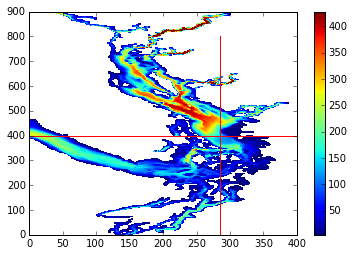

In [5]:
plt.pcolormesh(bathy[:])
j=400
i=285
plt.plot([0,400],[j,j],'r')
plt.plot([i,i],[0,800],'r')
plt.colorbar()

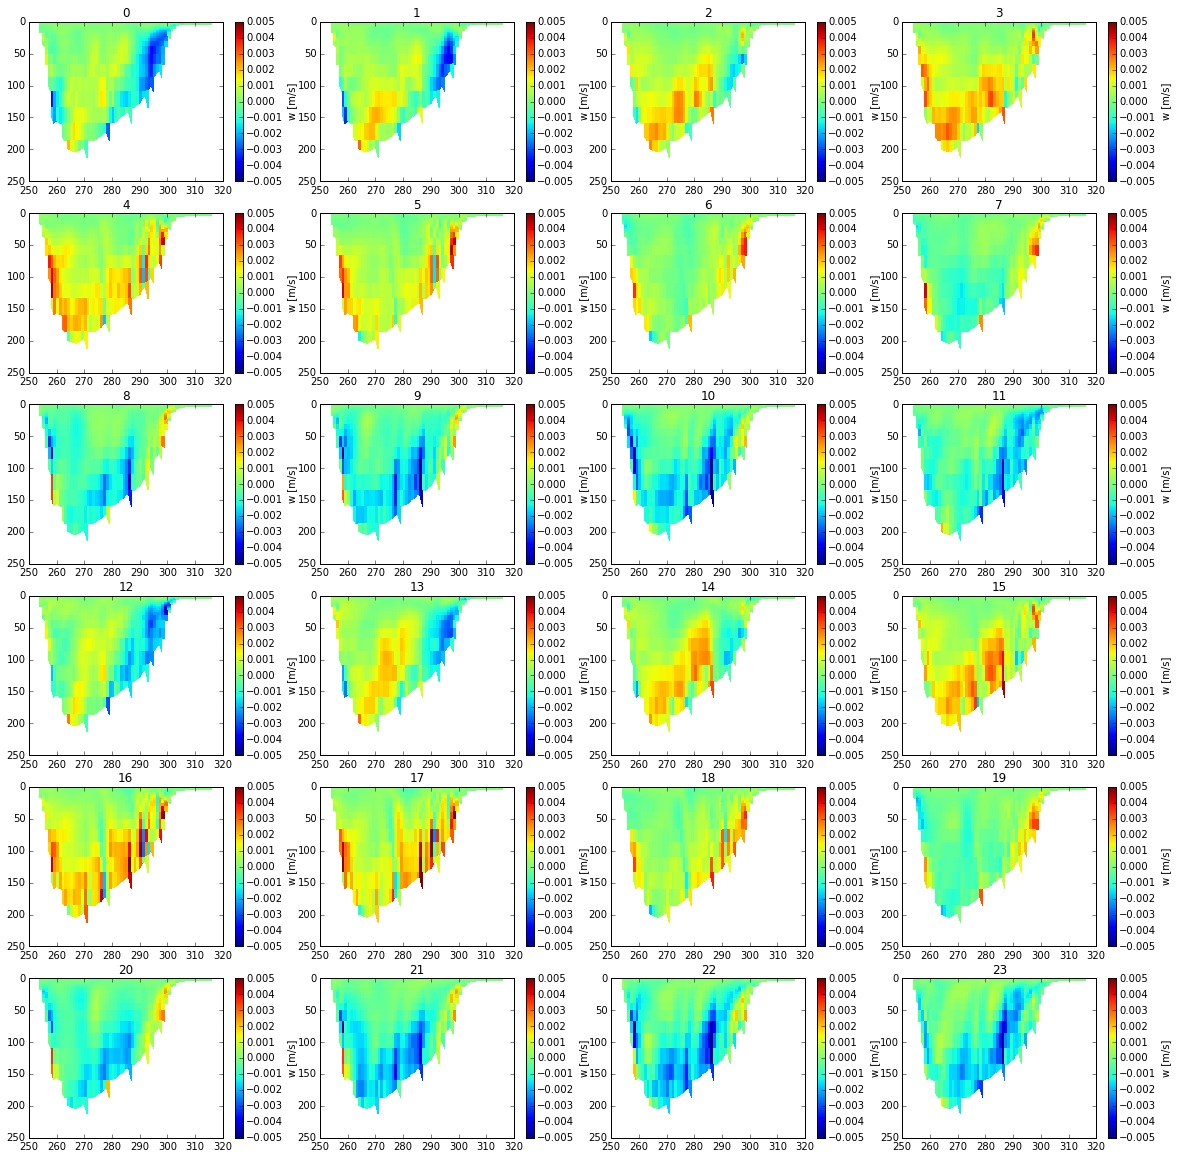

In [6]:
fig, axs = plt.subplots(6,4, figsize=(20,20))
x, _ = np.meshgrid(np.arange(w.shape[-1]),depw[:,1,1])
for t,ax in zip(np.arange(w.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, depw[:,j,:], w[t,:,j,:],vmin=-0.005,vmax=0.005)
    ax.axis([250,320,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('w [m/s]') 
    ax.set_title(t)

Coherhent beams? Do I have to separate barotoproic combeinent somehow? Is this just noise? Maybe look at baroclinic u? What about at a certain freqeuncy?

In [7]:
depav_u= analyze.depth_average_mask(u,e3u,umask,1)
depav_u = np.expand_dims(depav_u,1)
ubc = u-depav_u

In [8]:
depav_v= analyze.depth_average_mask(v,e3v,vmask,1)
depav_v = np.expand_dims(depav_v,1)
vbc = v-depav_v

del depav_u, depav_v, depw, e3w, umask, vmask, e3u, e3v

In [9]:
iss=200; iee=350
jss=200; jee=600;
ubc, vbc = viz_tools.unstagger(ubc[:,:,jss:jee,iss:iee],vbc[:,:,jss:jee,iss:iee])

ke = 0.5*(ubc**2+vbc**2)

Horizontal cross section from above (about)

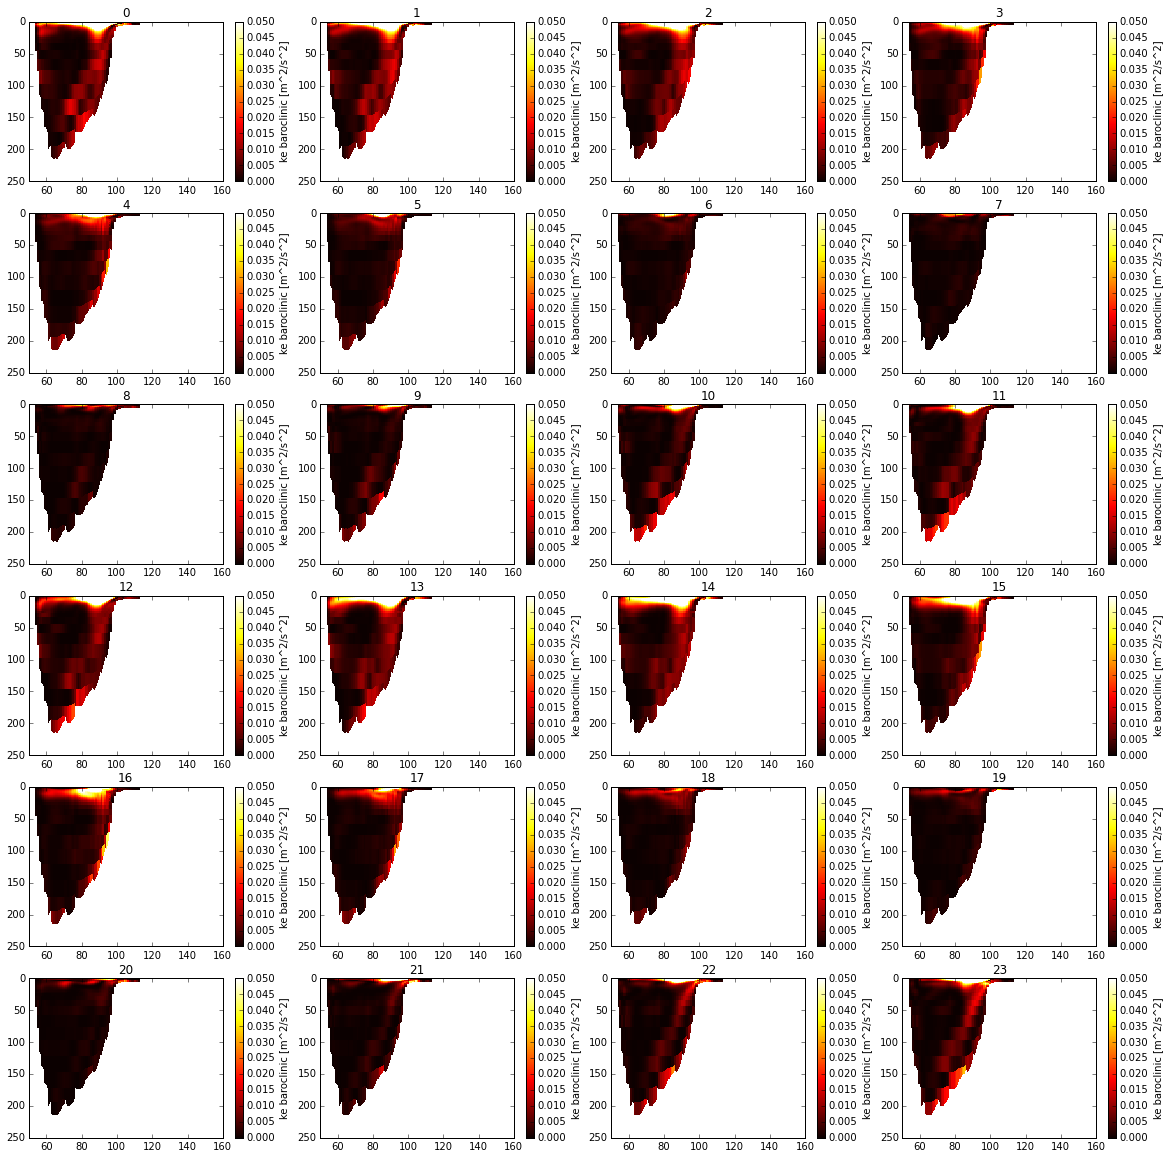

In [10]:
j=200
fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-1]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,j,:], ke[t,:,j,:],cmap='hot',vmin=0,vmax=0.05)
    ax.axis([50,160,250,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

Maybe it is about time to do a back of the envelope calculation for the angle of any internal wave beams we might expect. 

Question: is the wave generated by a relflection from a different source or is the banks the generation point, Look at the reference Susan suggested.

Could we pick these up at the East/Central node?

Vertical cross section from above

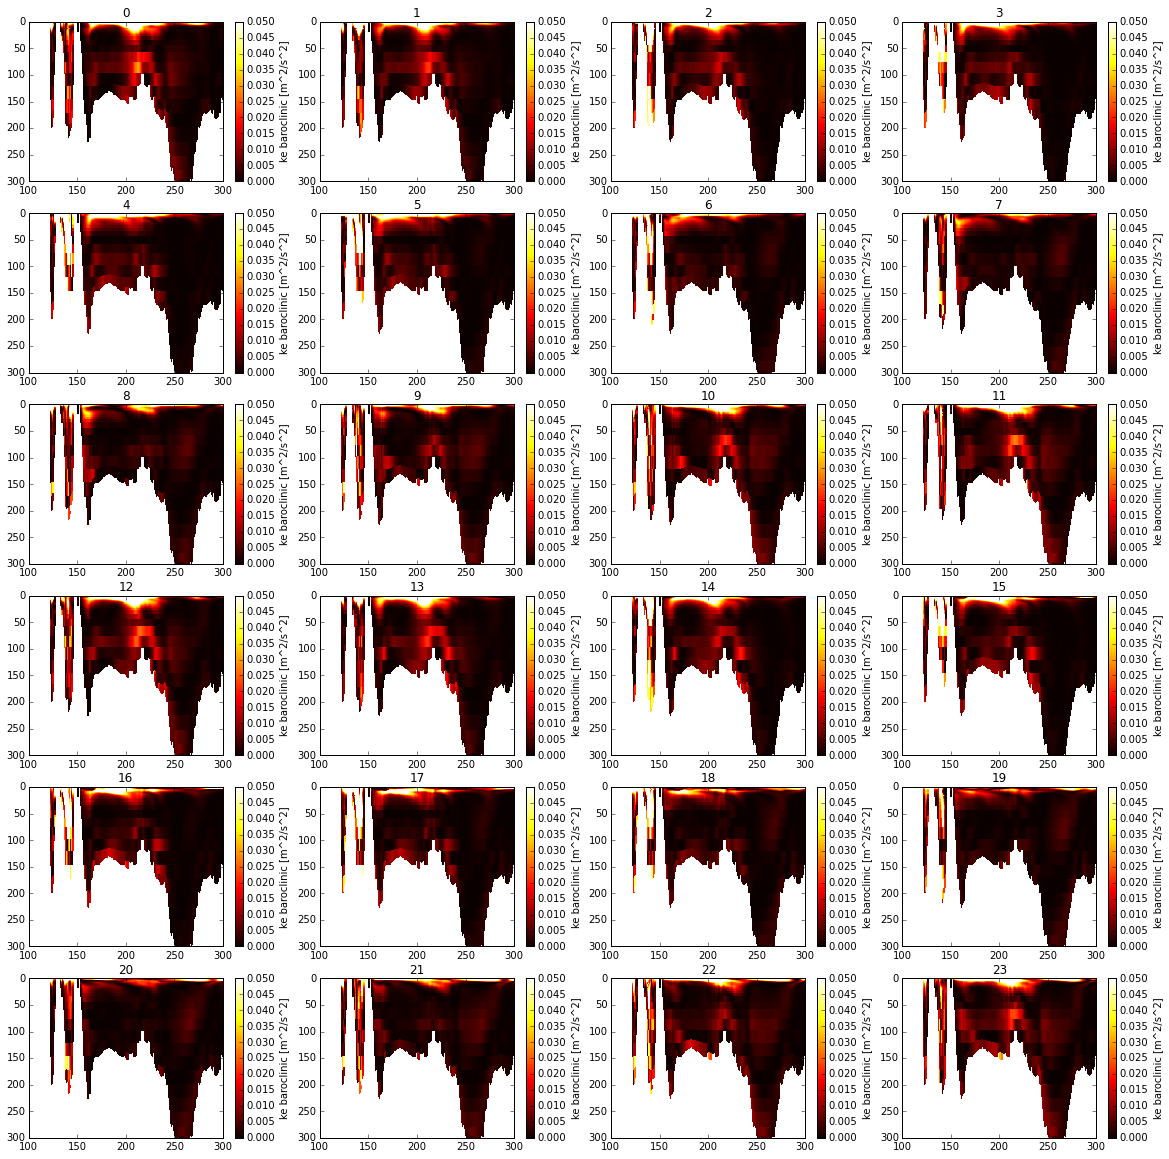

In [11]:
i=85
fig, axs = plt.subplots(6,4, figsize=(20,20))
subdep = dept[:,jss:jee,iss:iee]
subdep = subdep[:,1:,1:]
x, _ = np.meshgrid(np.arange(ke.shape[-2]),dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, subdep[:,:,i], ke[t,:,:,i],cmap='hot',vmin=0,vmax=0.05)
    ax.axis([100,300,300,0])
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

Surface

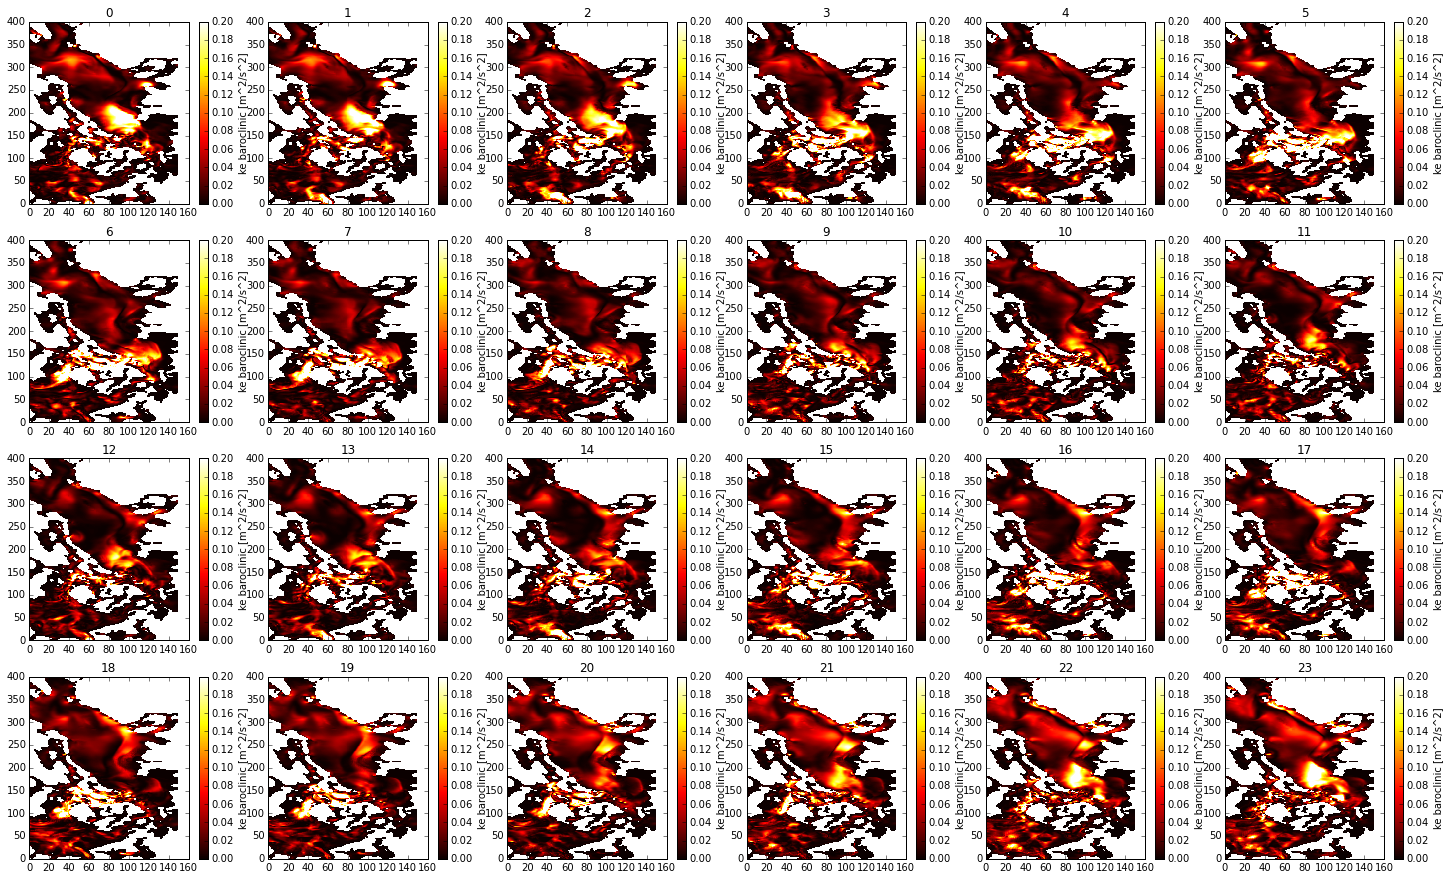

In [12]:

fig, axs = plt.subplots(4,6, figsize=(25,15))
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh( ke[t,0,:,:],cmap='hot',vmin=0,vmax=0.2)
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

Diaganoal slice

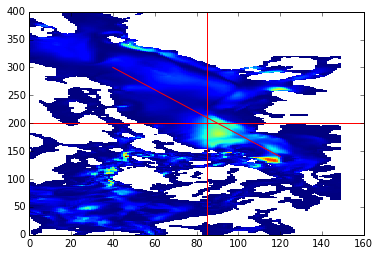

In [13]:
plt.pcolormesh(ke[23,0,:,:])
ivec = np.arange(120,39,-1)
jvec = np.arange(140,302,2)
plt.plot(ivec, jvec,'r')
plt.plot([85,85], [0,400],'r')
plt.plot([0,160],[200,200],'r')

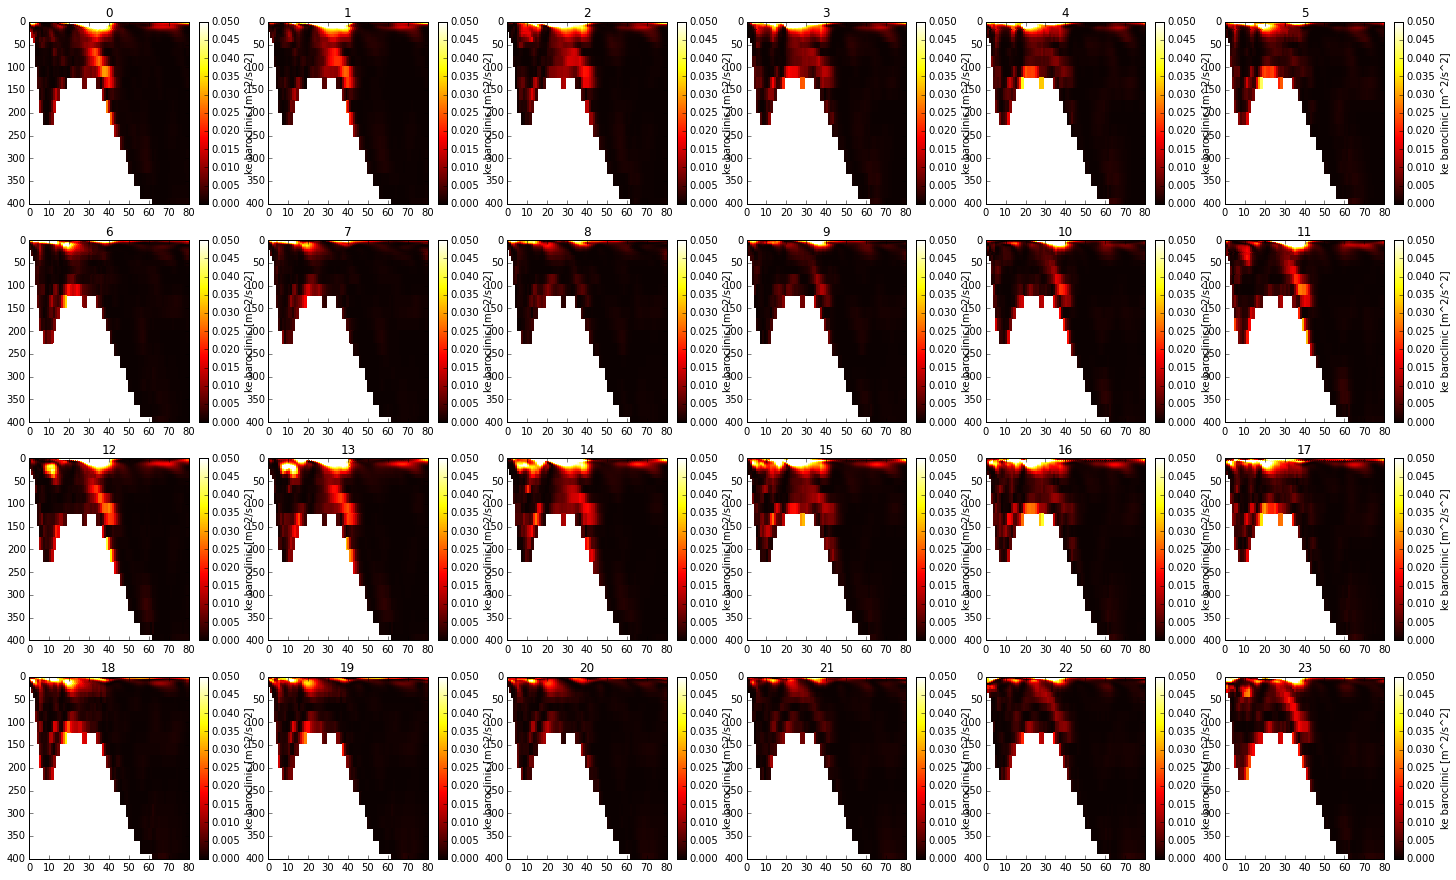

In [14]:

fig, axs = plt.subplots(4,6, figsize=(25,15))
x,_ = np.meshgrid(np.arange(ke[t,:,jvec, ivec].shape[0]), dept[:,1,1])
for t,ax in zip(np.arange(ke.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, dept[:, jvec, ivec], ke[t,:,jvec, ivec].T,cmap='hot',vmin=0,vmax=0.05)
    cbar=plt.colorbar(mesh, ax=ax)
    ax.axis([0,80,400,0])
    cbar.set_label('ke baroclinic [m^2/s^2]') 
    ax.set_title(t)

I think I need energy fluxes to see the direction.

Salinity

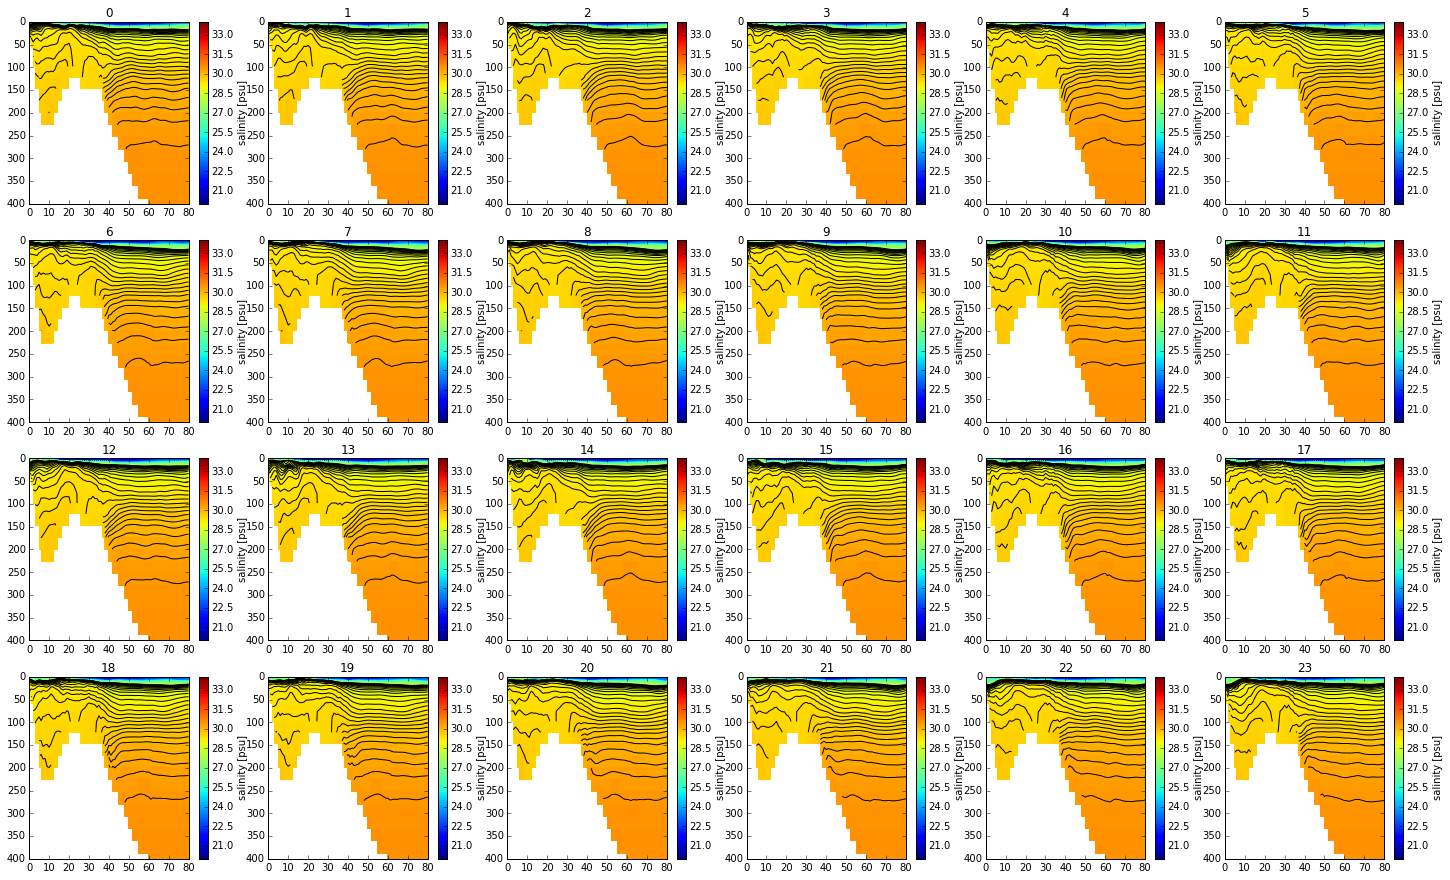

In [15]:

fig, axs = plt.subplots(4,6, figsize=(25,15))
ssub=s[:,:,jss:jee,iss:iee]
ssub=ssub[:,:,1:,1:]
x,_ = np.meshgrid(np.arange(ssub[t,:,jvec, ivec].shape[0]), dept[:,1,1])
for t,ax in zip(np.arange(ssub.shape[0]),axs.flatten()):
    mesh =ax.pcolormesh(x, dept[:, jvec, ivec], ssub[t,:,jvec, ivec].T,cmap='jet',vmin=20,vmax=34)
    cbar=plt.colorbar(mesh, ax=ax)
    ax.contour(x, dept[:, jvec, ivec], ssub[t,:,jvec, ivec].T, np.arange(28,32.5,.1), colors='k')
    ax.axis([0,80,400,0])
    cbar.set_label('salinity [psu]') 
    ax.set_title(t)